In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab \Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
df = pd.read_csv('sensor_csv.csv')
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
# Assuming 'machine_status' is the target variable. Adjust if needed.
X = df.drop('machine_status', axis=1)
y = df['machine_status']

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Features (X) and Target (Y) have been defined.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Features (X) and Target (Y) have been defined.
X_train shape: (176256, 54)
X_test shape: (44064, 54)
y_train shape: (176256,)
y_test shape: (44064,)


In [ ]:
df_pump = X.copy() # Creates a new DataFrame for visualization using the features in X
df_pump.head() #visualization of the train set

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889


In [ ]:
df_pump['machine_status'] = y # Adds the target variable 'machine_status' to the new DataFrame
df_pump

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


In [ ]:
# Drop the 'timestamp' and 'Unnamed: 0' columns from X_train and X_test
X_train_processed = X_train.drop(columns=['timestamp', 'Unnamed: 0'])
X_test_processed = X_test.drop(columns=['timestamp', 'Unnamed: 0'])

my_tree = tree.DecisionTreeClassifier()
my_tree = my_tree.fit(X_train_processed, y_train) #decision tree creation

print("Decision tree model trained successfully after removing non-numeric columns.")

Decision tree model trained successfully after removing non-numeric columns.


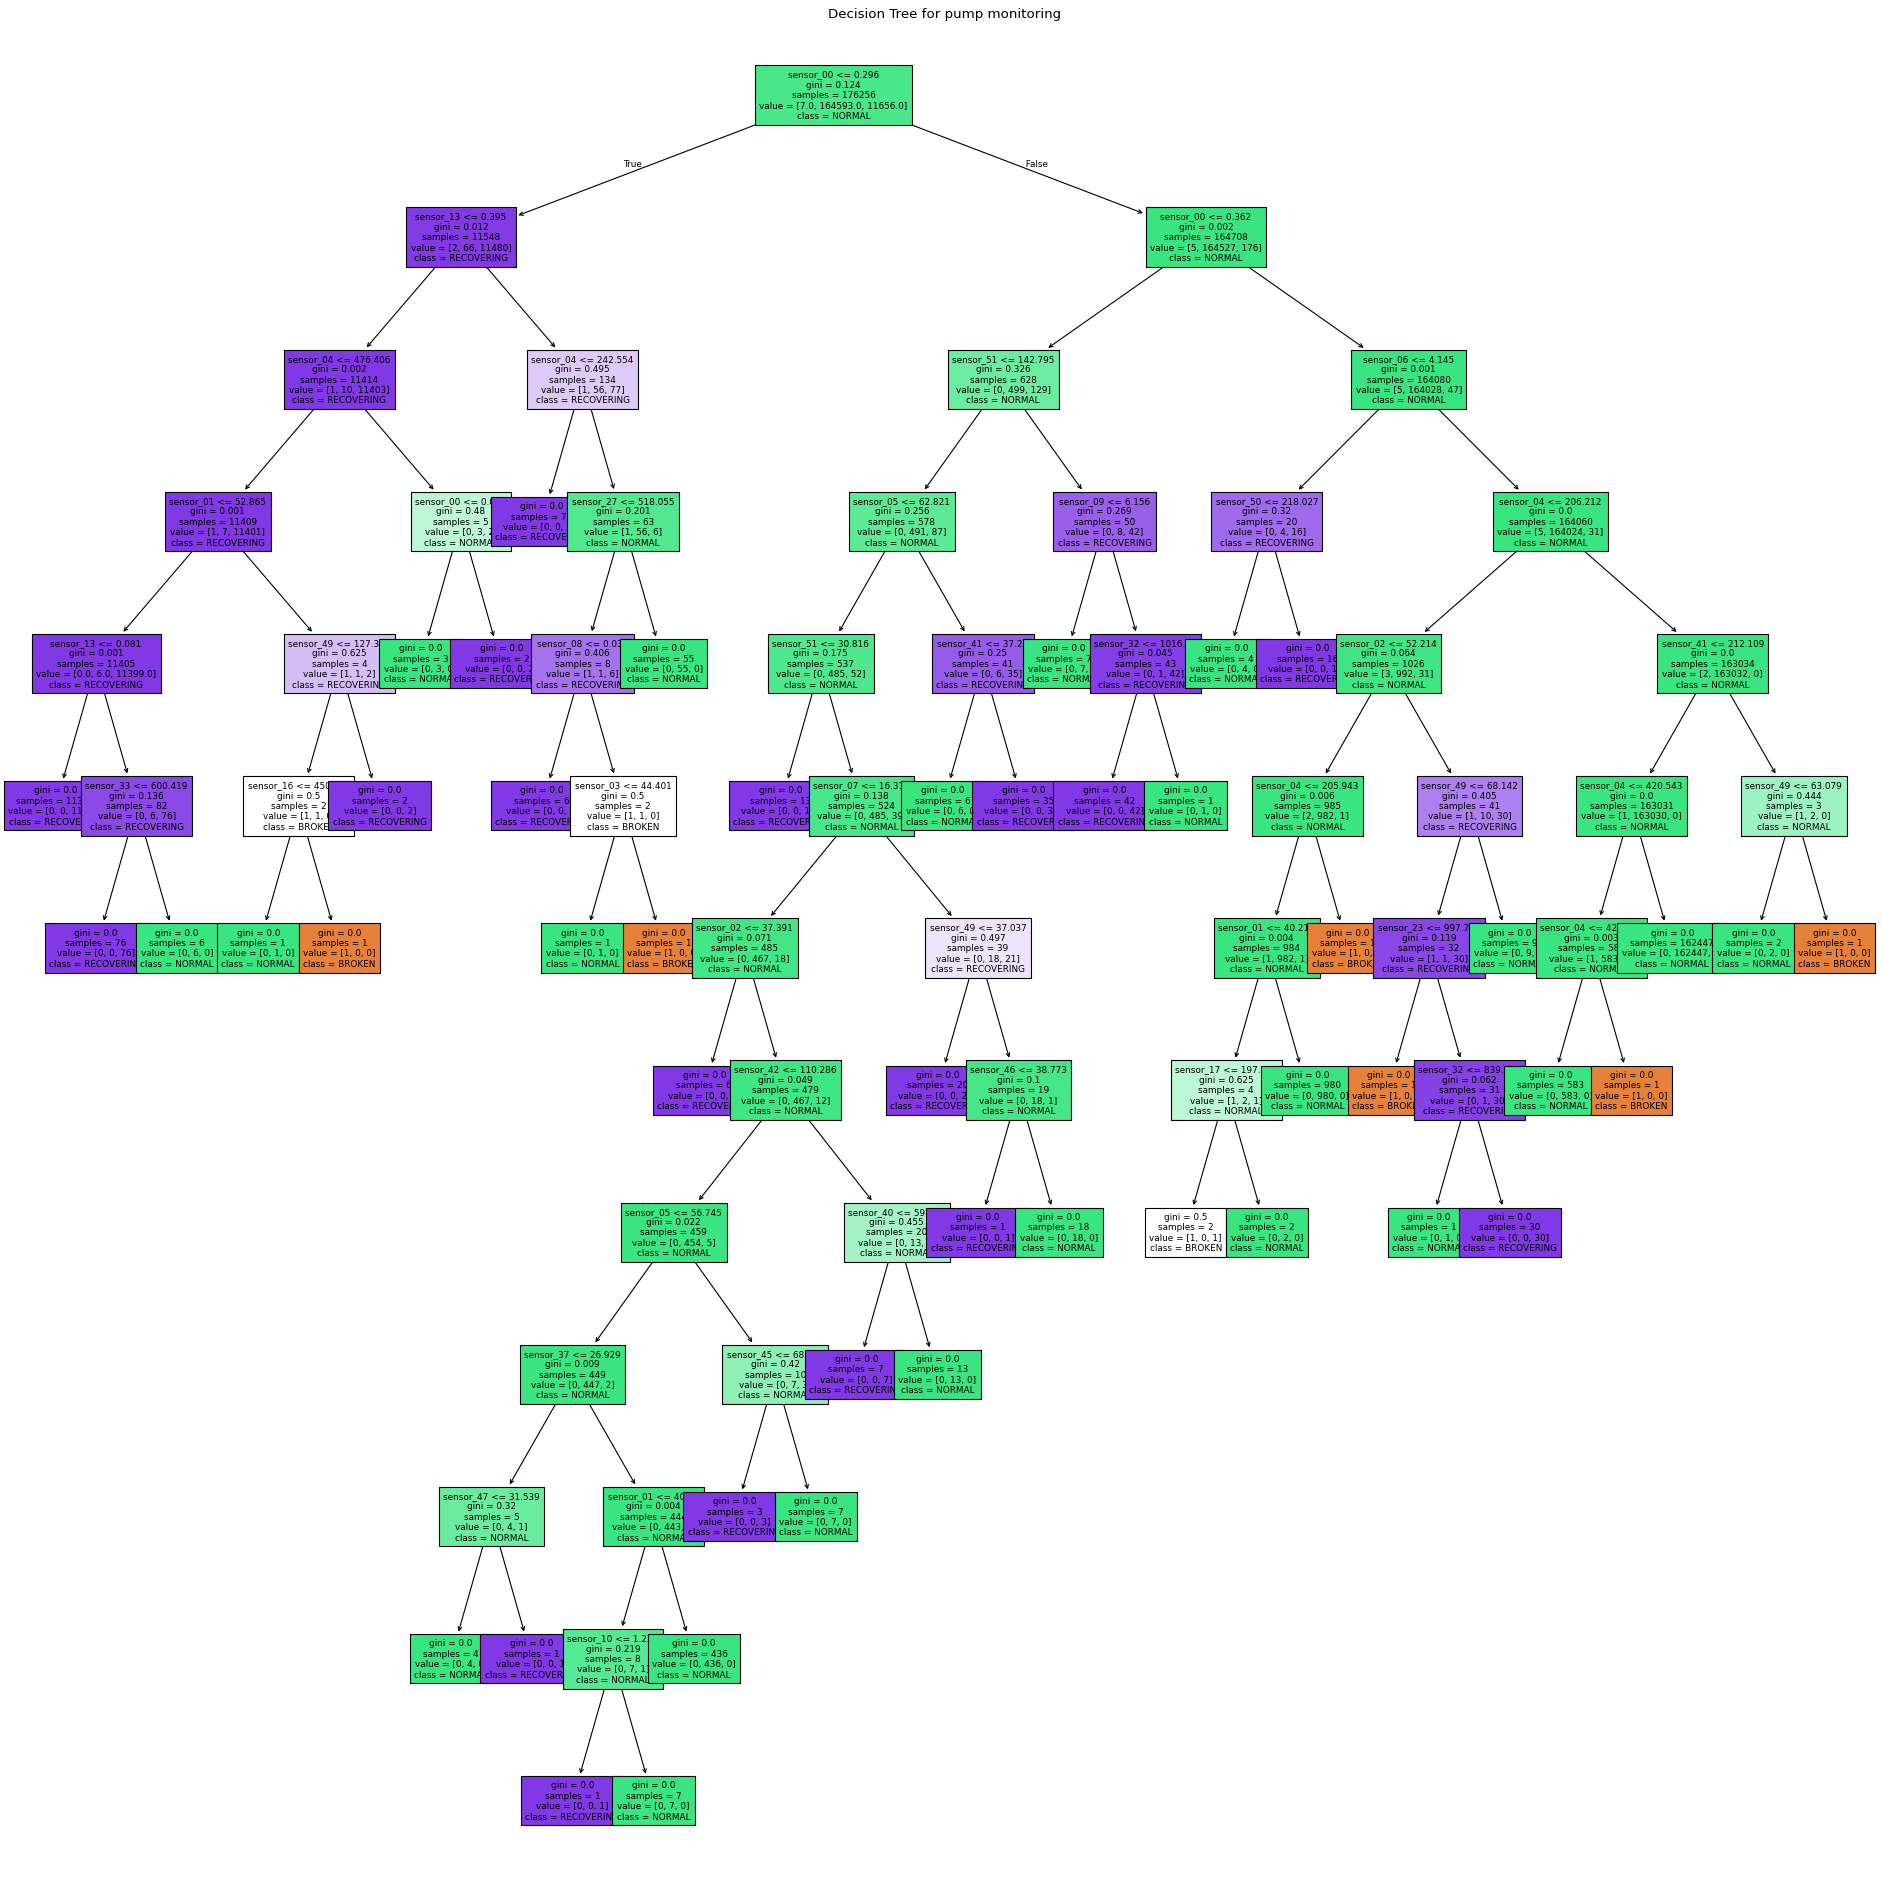

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30), dpi=80) # Adjust figsize to a reasonable dimension
plot_tree(my_tree, filled=True, feature_names=X_train_processed.columns, class_names=my_tree.classes_, fontsize=8) # Increase fontsize for better readability
plt.title("Decision Tree for pump monitoring")
plt.show()

In [ ]:
y_predicted = my_tree.predict(X_test_processed)
y_predicted

array(['NORMAL', 'NORMAL', 'NORMAL', ..., 'NORMAL', 'NORMAL', 'NORMAL'],
      dtype=object)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:


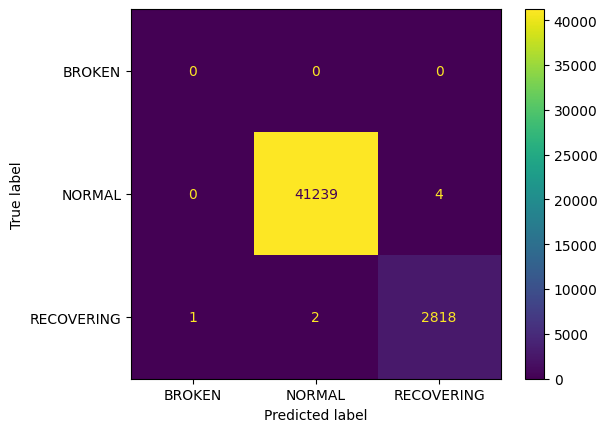


Accuracy: 0.9998
Precision: 0.9999
Recall: 0.9998
F1 Score: 0.9999


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
c_matrix = confusion_matrix(y_test, y_predicted)
my_accuracy = accuracy_score(y_test, y_predicted)
my_precision= precision_score(y_test, y_predicted, average='weighted')
my_recall = recall_score(y_test, y_predicted, average='weighted')
my_f1_score = f1_score(y_test, y_predicted, average='weighted')
c_matrix
my_accuracy
my_precision
my_recall
my_f1_score

print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=my_tree.classes_)
disp.plot ()
plt.show()


print(f"\nAccuracy: {my_accuracy:.4f}")
print(f"Precision: {my_precision:.4f}")
print(f"Recall: {my_recall:.4f}")
print(f"F1 Score: {my_f1_score:.4f}") # to see if my model is making a very few false positive or false negative predictions.

In [ ]:
from sklearn.metrics import classification_report

my_report = classification_report (y_test, y_predicted, target_names=my_tree.classes_)
print("Classification Report:")
print(my_report)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

      BROKEN       0.00      0.00      0.00         0
      NORMAL       1.00      1.00      1.00     41243
  RECOVERING       1.00      1.00      1.00      2821

    accuracy                           1.00     44064
   macro avg       0.67      0.67      0.67     44064
weighted avg       1.00      1.00      1.00     44064



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Drop the 'timestamp' and 'Unnamed: 0' columns from X_train and X_test for the newly split data
X_train_processed = X_train.drop(columns=['timestamp', 'Unnamed: 0'])
X_test_processed = X_test.drop(columns=['timestamp', 'Unnamed: 0'])

# Re-train the decision tree model with the new stratified training data
my_tree = tree.DecisionTreeClassifier()
my_tree = my_tree.fit(X_train_processed, y_train)

print("Decision tree model re-trained successfully with stratified data.")

Decision tree model re-trained successfully with stratified data.


Confusion Matrix:


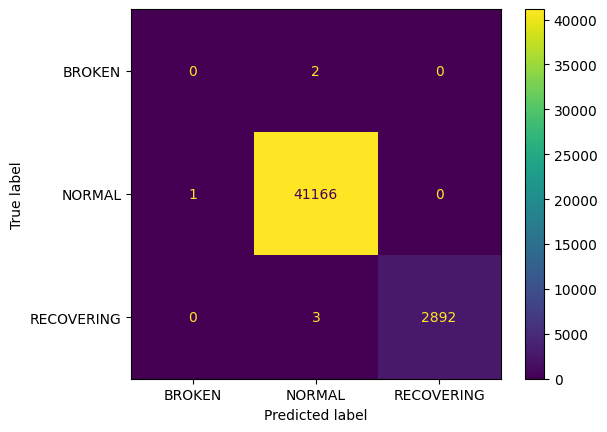


Accuracy: 0.9999
Precision: 0.9998
Recall: 0.9999
F1 Score: 0.9999


In [ ]:
# Re-predict on the new test set
y_predicted = my_tree.predict(X_test_processed)

# Re-calculate evaluation metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
c_matrix = confusion_matrix(y_test, y_predicted)
my_accuracy = accuracy_score(y_test, y_predicted)
my_precision = precision_score(y_test, y_predicted, average='weighted', zero_division=0)
my_recall = recall_score(y_test, y_predicted, average='weighted', zero_division=0)
my_f1_score = f1_score(y_test, y_predicted, average='weighted', zero_division=0)

print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=my_tree.classes_)
disp.plot()
plt.show()

print(f"\nAccuracy: {my_accuracy:.4f}")
print(f"Precision: {my_precision:.4f}")
print(f"Recall: {my_recall:.4f}")
print(f"F1 Score: {my_f1_score:.4f}")

In [ ]:
# Re-generate the classification report
from sklearn.metrics import classification_report

my_report = classification_report(y_test, y_predicted, target_names=my_tree.classes_, zero_division=0)
print("Classification Report (after stratification):")
print(my_report)

Classification Report (after stratification):
              precision    recall  f1-score   support

      BROKEN       0.00      0.00      0.00         2
      NORMAL       1.00      1.00      1.00     41167
  RECOVERING       1.00      1.00      1.00      2895

    accuracy                           1.00     44064
   macro avg       0.67      0.67      0.67     44064
weighted avg       1.00      1.00      1.00     44064



In [ ]:
print("Distribution of 'machine_status' in the full dataset:")
print(df['machine_status'].value_counts())

# Re-split the data with stratification to ensure all classes are represented
# This time, we will use the original X and y to ensure proper stratification.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nDistribution of 'machine_status' in the new y_test (after stratification):")
print(y_test.value_counts())

print("\nData re-split with stratification. Now X_train, X_test, y_train, y_test are updated.")

Distribution of 'machine_status' in the full dataset:
machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64

Distribution of 'machine_status' in the new y_test (after stratification):
machine_status
NORMAL        41167
RECOVERING     2895
BROKEN            2
Name: count, dtype: int64

Data re-split with stratification. Now X_train, X_test, y_train, y_test are updated.


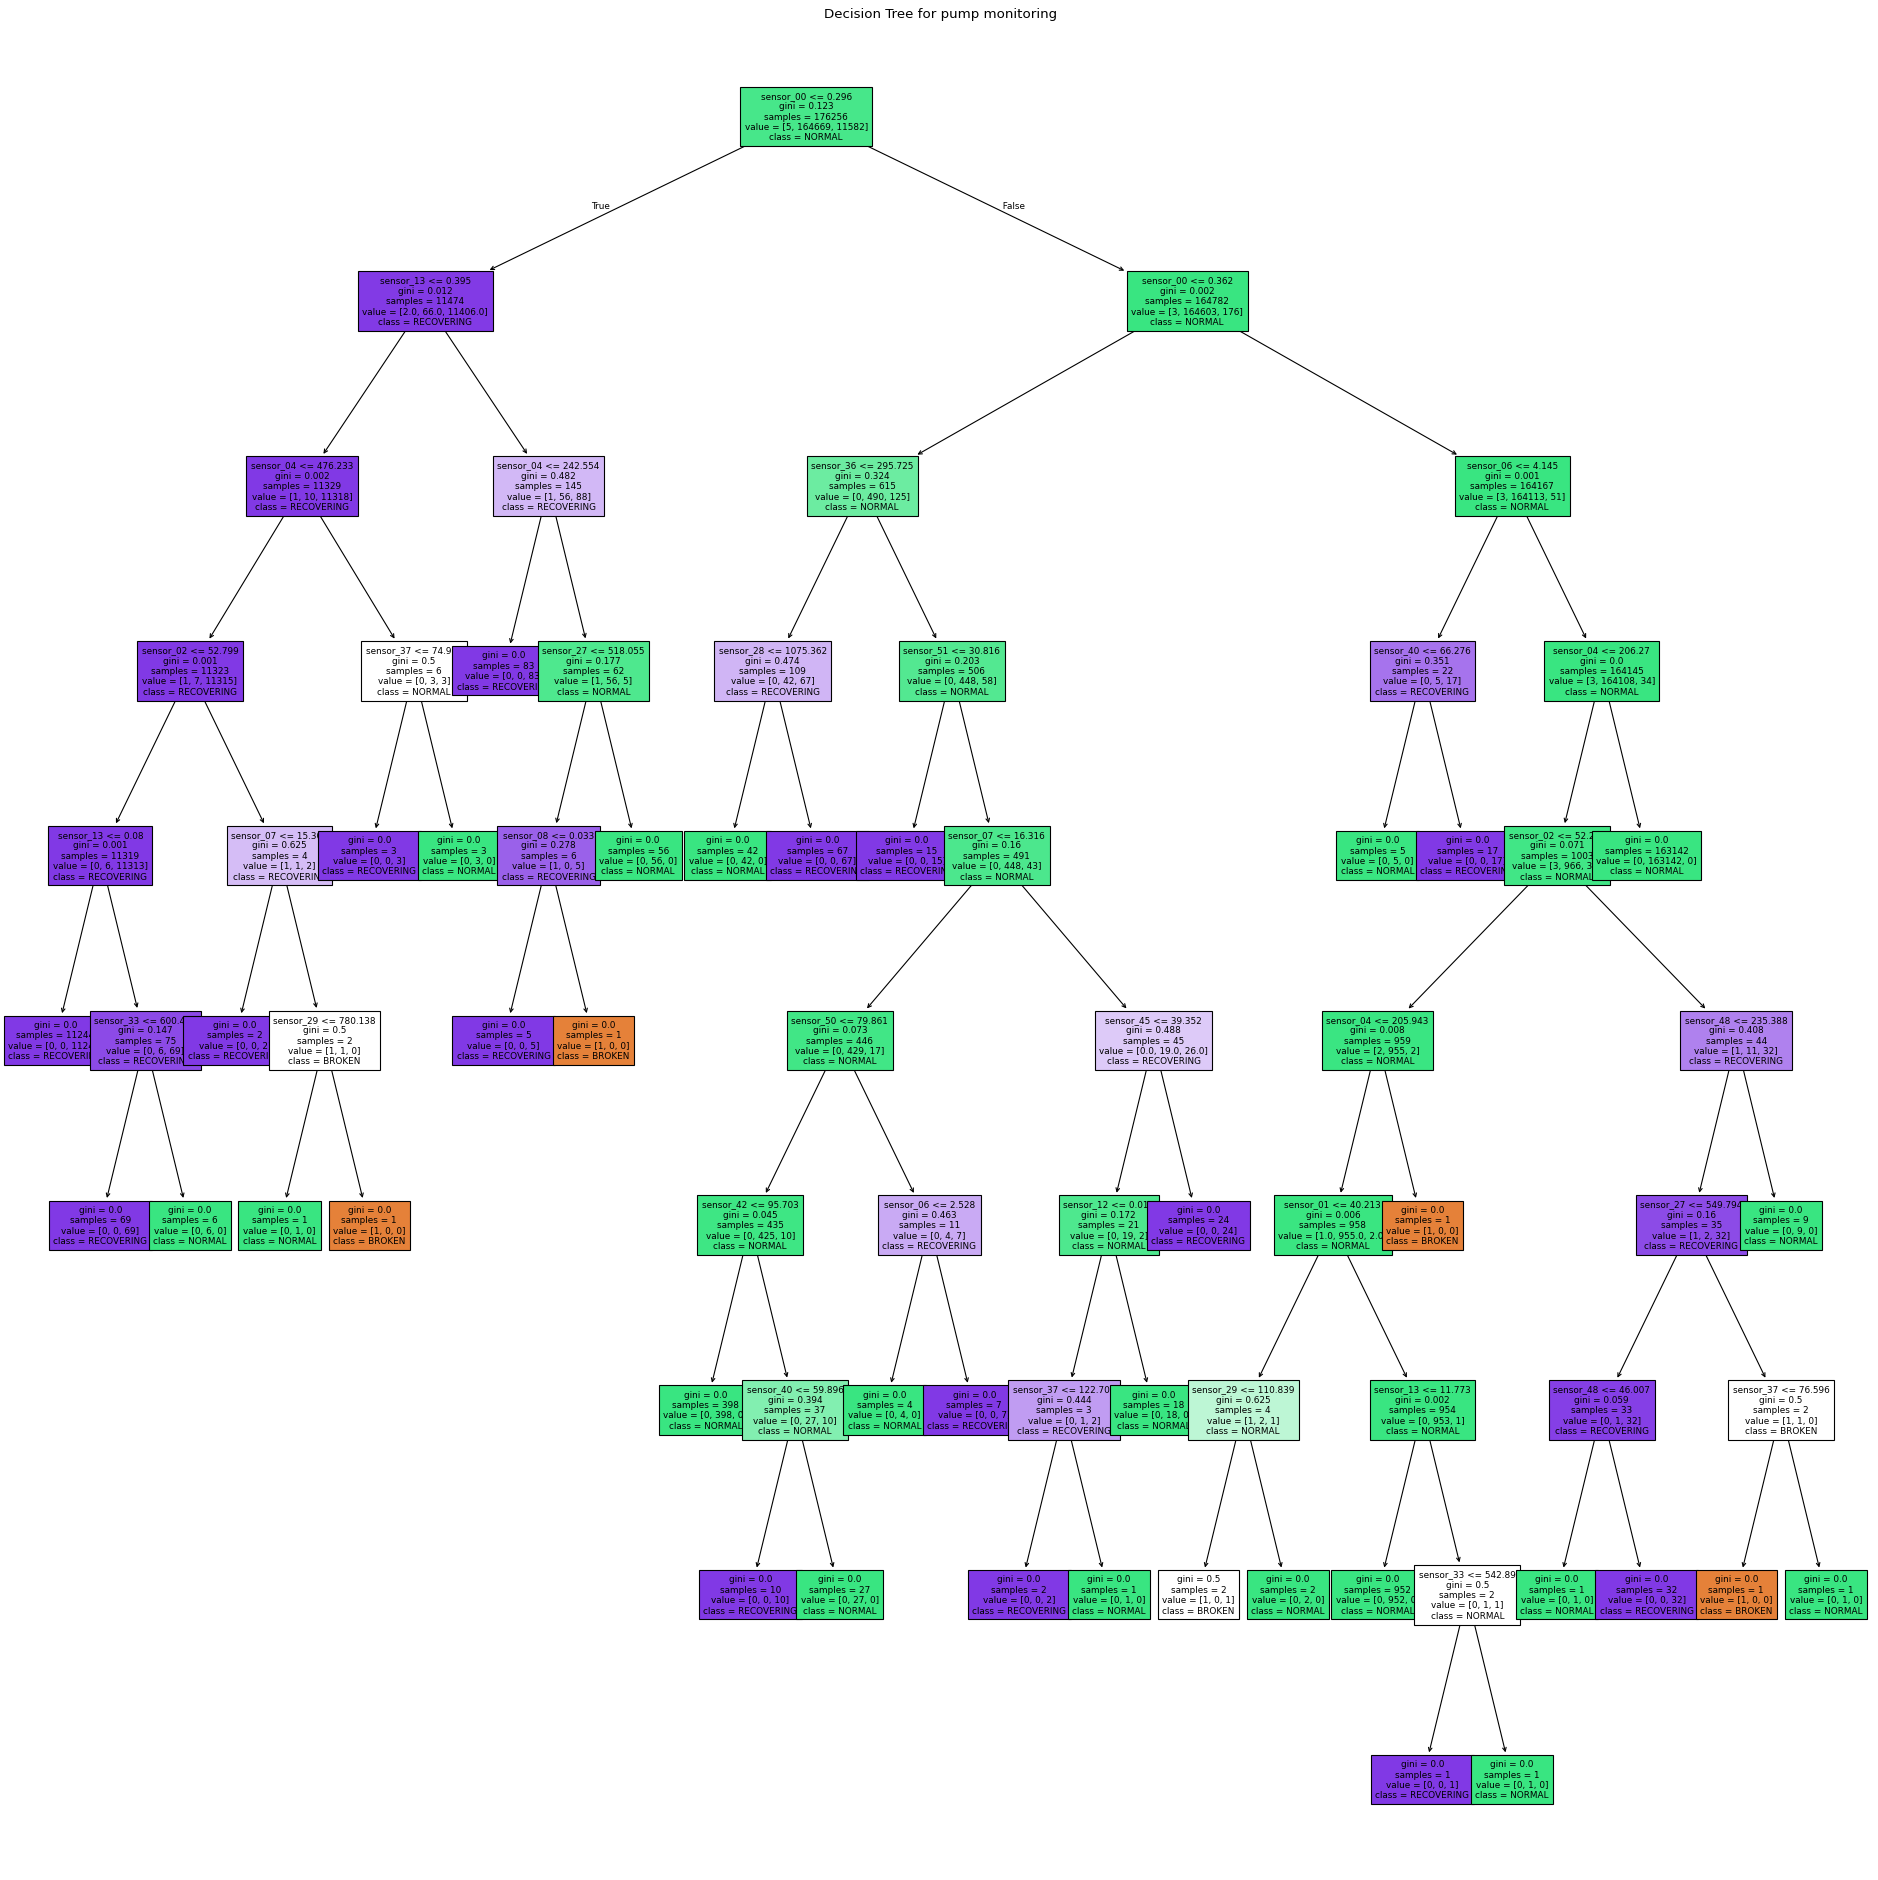

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30), dpi=80) # Adjust figsize to a reasonable dimension
plot_tree(my_tree, filled=True, feature_names=X_train_processed.columns, class_names=my_tree.classes_, fontsize=8) # Increase fontsize for better readability
plt.title("Decision Tree for pump monitoring")
plt.show()

In [ ]:
#using my tree for a prediction

In [ ]:
import pandas as pd

# Get the feature names from the data the model was trained on
feature_names = X_train_processed.columns

# Create some example dummy data. Ensure the number of values matches the number of features.
# The values here are just placeholders; you can adjust them based on typical sensor readings.
dummy_data = pd.DataFrame([{
    'sensor_00': 2.5, 'sensor_01': 48.0, 'sensor_02': 53.0, 'sensor_03': 46.0,
    'sensor_04': 630.0, 'sensor_05': 75.0, 'sensor_06': 13.5, 'sensor_07': 16.0,
    'sensor_08': 15.0, 'sensor_09': 15.0, 'sensor_10': 15.0, 'sensor_11': 42.0,
    'sensor_12': 42.0, 'sensor_13': 50.0, 'sensor_14': 500.0, 'sensor_15': 38.0,
    'sensor_16': 38.0, 'sensor_17': 270.0, 'sensor_18': 260.0, 'sensor_19': 220.0,
    'sensor_20': 220.0, 'sensor_21': 470.0, 'sensor_22': 480.0, 'sensor_23': 300.0,
    'sensor_24': 300.0, 'sensor_25': 200.0, 'sensor_26': 200.0, 'sensor_27': 200.0,
    'sensor_28': 200.0, 'sensor_29': 2.0, 'sensor_30': 2.0, 'sensor_31': 2.0,
    'sensor_32': 2.0, 'sensor_33': 2.0, 'sensor_34': 2.0, 'sensor_35': 2.0,
    'sensor_36': 2.0, 'sensor_37': 2.0, 'sensor_38': 2.0, 'sensor_39': 2.0,
    'sensor_40': 2.0, 'sensor_41': 2.0, 'sensor_42': 31.0, 'sensor_43': 41.0,
    'sensor_44': 39.0, 'sensor_45': 65.0, 'sensor_46': 50.0, 'sensor_47': 38.0,
    'sensor_48': 155.0, 'sensor_49': 67.0, 'sensor_50': 240.0, 'sensor_51': 200.0
}], columns=feature_names)

print("Dummy data for prediction:")
display(dummy_data)

# Use the trained model to predict the machine status for the dummy data
dummy_prediction = my_tree.predict(dummy_data)

print(f"\nPredicted machine status for the dummy data: {dummy_prediction[0]}")

Dummy data for prediction:


,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,2.5,48.0,53.0,46.0,630.0,75.0,13.5,16.0,15.0,15.0,...,31.0,41.0,39.0,65.0,50.0,38.0,155.0,67.0,240.0,200.0



Predicted machine status for the dummy data: NORMAL


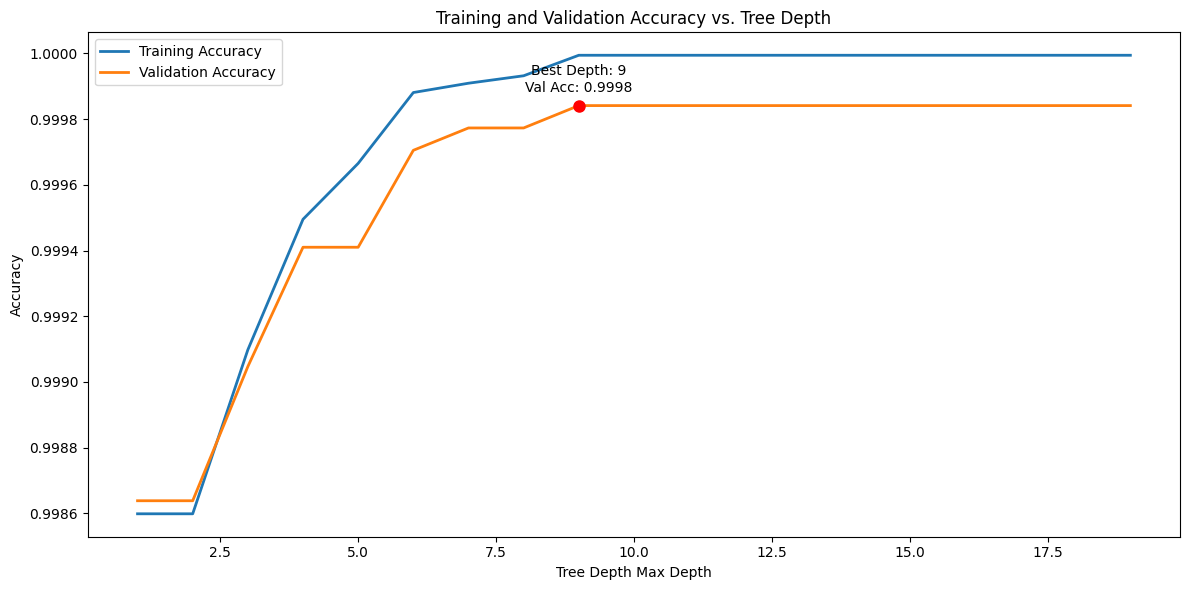

In [ ]:
#Overfitting and underfitting data

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

depths = list(range (1, 20))

train_acc = []
val_acc = [] # Renamed from test_acc to val_acc for consistency with plot labels

for d in depths:
  clf = tree.DecisionTreeClassifier(max_depth=d, random_state = 42)
  clf = clf.fit(X_train_processed, y_train)
  y_predicted_train = clf.predict(X_train_processed)
  y_predicted_test = clf.predict(X_test_processed) # Changed X_test to X_test_processed
  train_acc.append(accuracy_score(y_train, y_predicted_train))
  val_acc.append(accuracy_score(y_test, y_predicted_test))

plt.figure(figsize=(12, 6))
plt.plot(depths, train_acc, label='Training Accuracy', linewidth=2, markersize=6)
plt.plot(depths, val_acc, label='Validation Accuracy', linewidth=2, markersize=6)
plt.xlabel('Tree Depth Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Tree Depth')
plt.legend()

# Find the best depth based on validation accuracy
best_depth_idx = val_acc.index(max(val_acc))
best_depth = depths[best_depth_idx]
best_val_acc = val_acc[best_depth_idx]

# Plot the best depth on the graph
plt.plot(best_depth, best_val_acc, 'ro', markersize=8, label=f'Best Depth ({best_depth})') # 'ro' for red circle marker
plt.annotate(f'Best Depth: {best_depth}\nVal Acc: {best_val_acc:.4f}',
             (best_depth, best_val_acc), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

plt.tight_layout()
plt.show() # Added plt.show() to display the plot

In [ ]:
my_tree_best_depth = tree.DecisionTreeClassifier(max_depth=best_depth, random_state=42)
my_tree_best_depth = my_tree_best_depth.fit(X_train_processed, y_train)

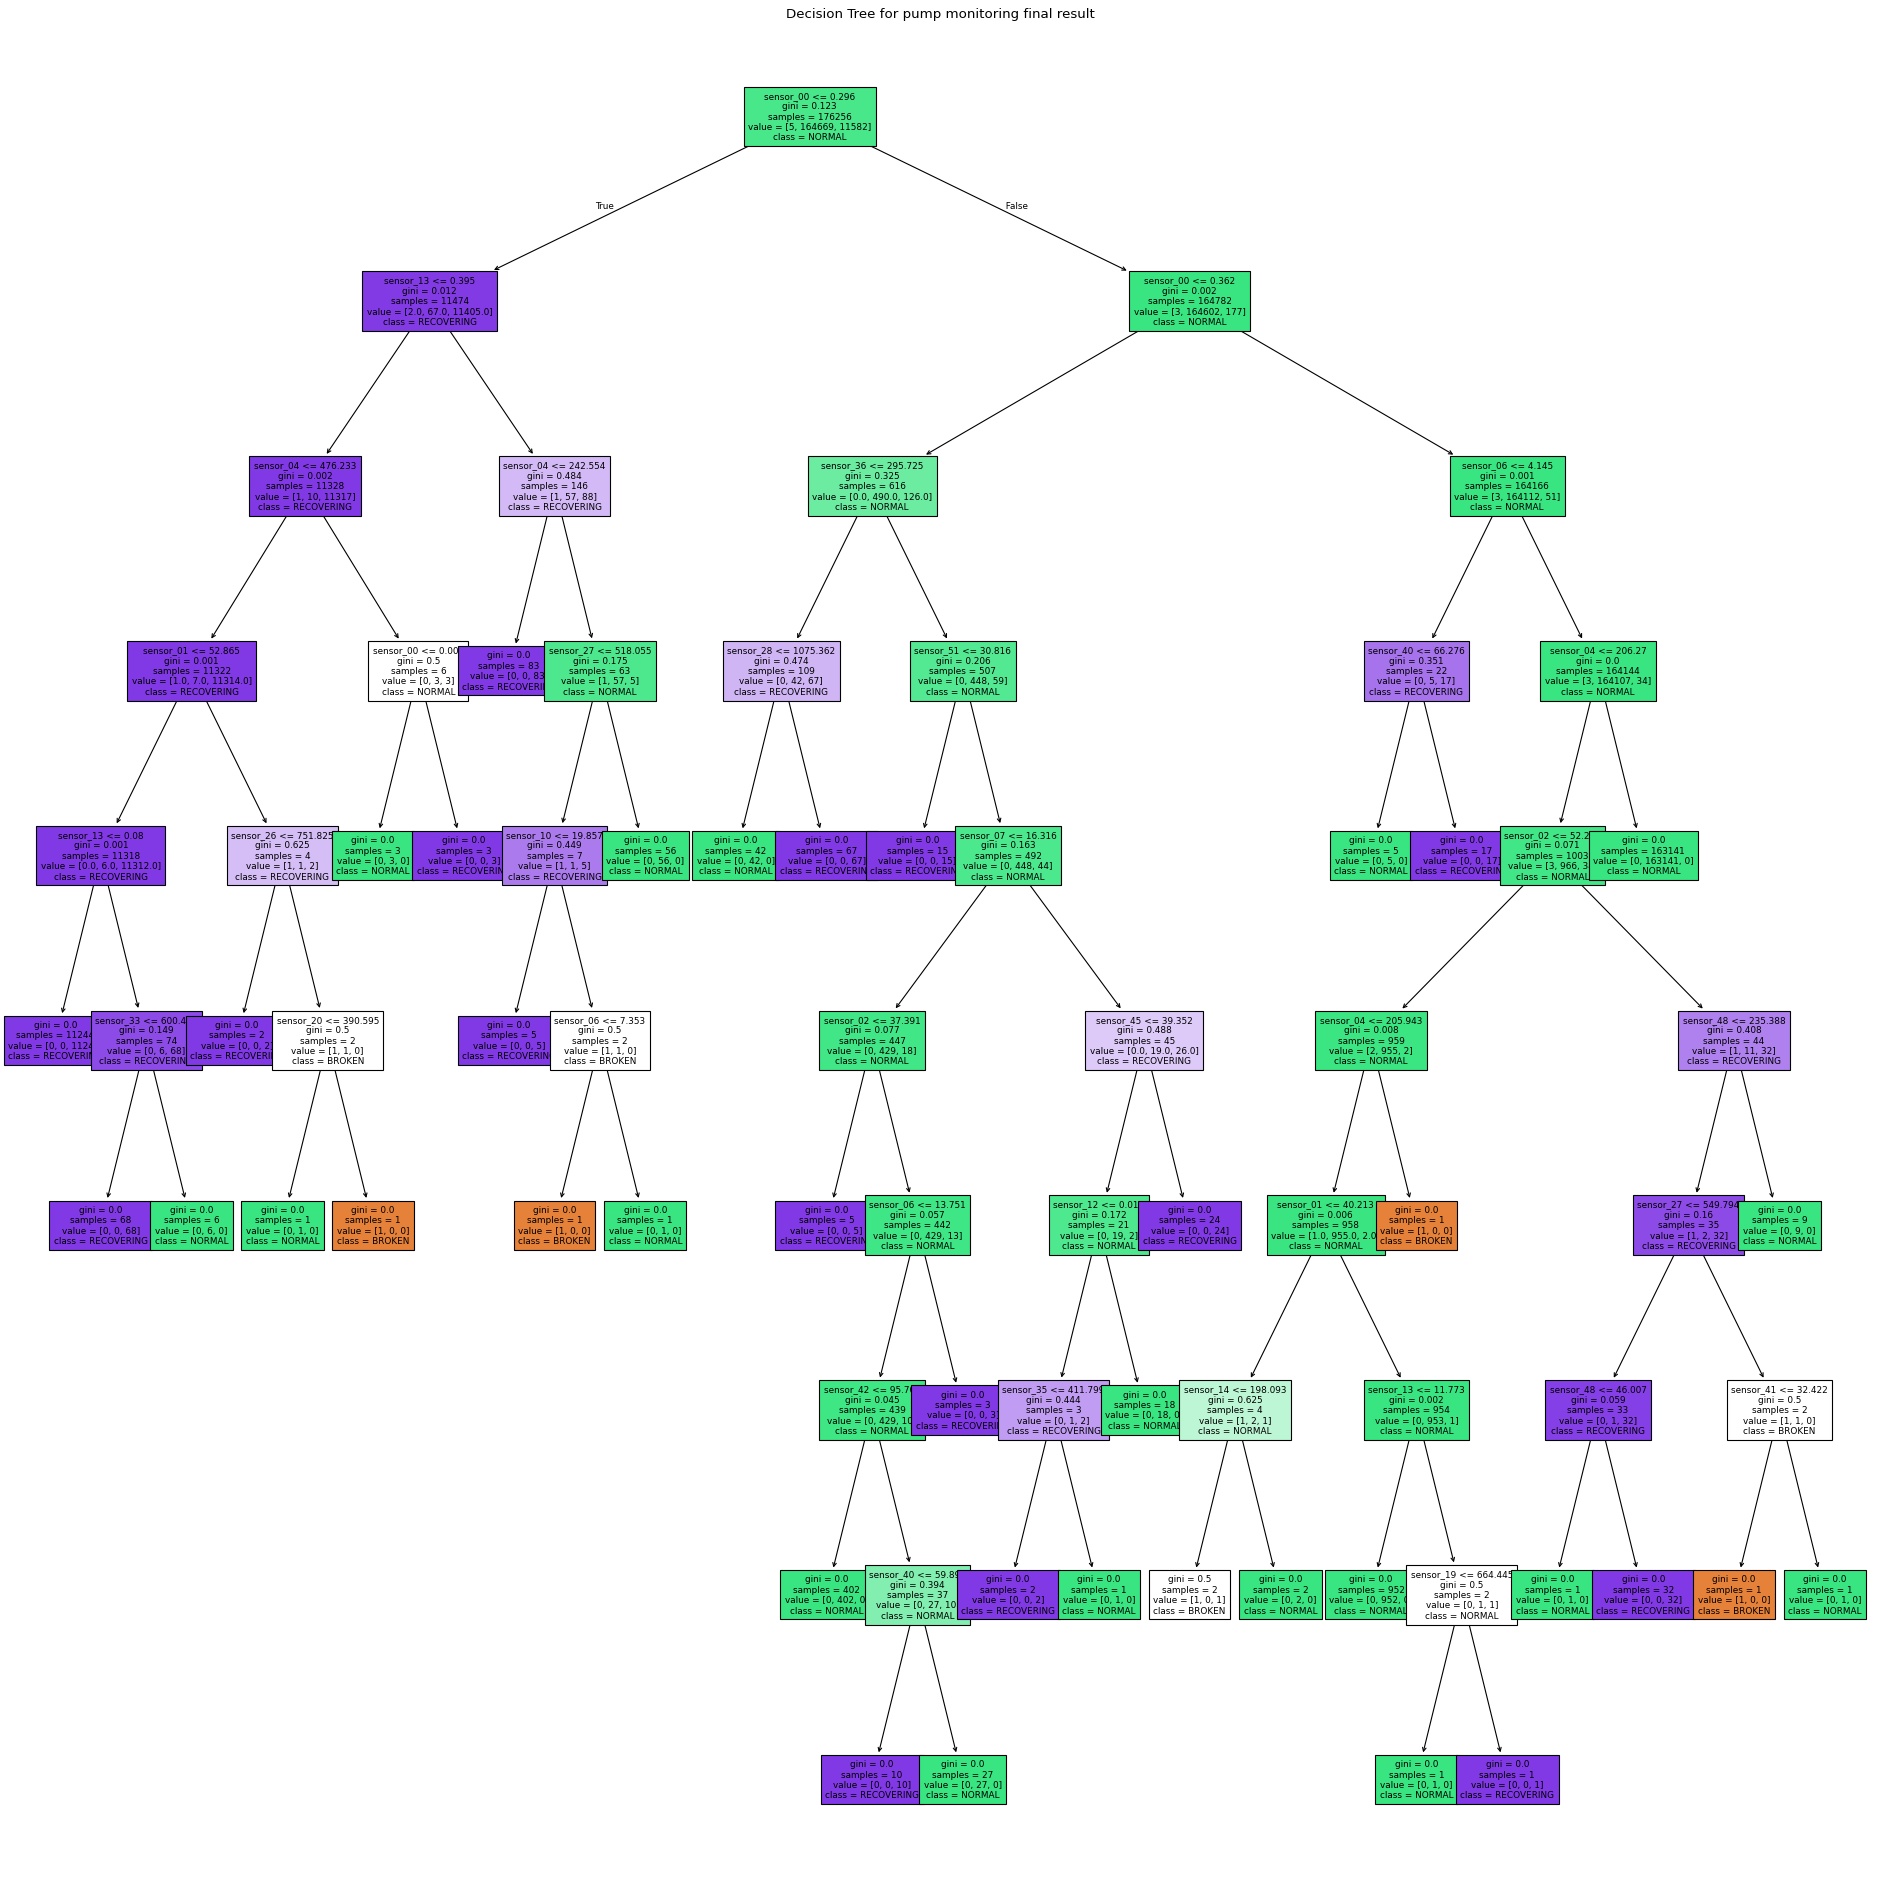

In [ ]:
plt.figure(figsize=(30, 30), dpi=80) # Adjust figsize to a reasonable dimension
plot_tree(my_tree_best_depth, filled=True, feature_names=X_train_processed.columns, class_names=my_tree.classes_, fontsize=8) # Increase fontsize for better readability
plt.title("Decision Tree for pump monitoring final result")
plt.show()